# Units of sigma vs probabilities
#### by Elizabeth Barnes

Ok - let's setup our python environment.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import importlib

import general_functions as gf
importlib.reload(gf)
gf.add_parent_dir_to_path()

from lib import class_general_functions as cgf
importlib.reload(cgf)

#.............................................
# PLOTTING COMMANDS
#.............................................
gf.cc()
plt.ioff()

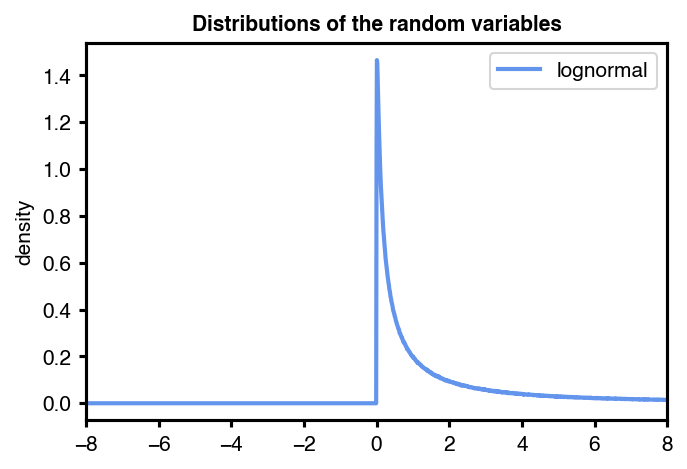

In [2]:
N0 = 10000000
xinc = 0.01
xbins = np.arange(-10,10,xinc)

Rlog = np.random.lognormal(0.,2.,size=(N0,))

cgf.cfig(1)

hx = np.histogram(Rlog,xbins)
plt.plot(hx[1][:-1],hx[0]/(float(N0)*xinc),'-',color='cornflowerblue', label='lognormal')

plt.legend()
plt.ylabel('density')
plt.xlim(-8,8)
plt.title('Distributions of the random variables')

plt.show()

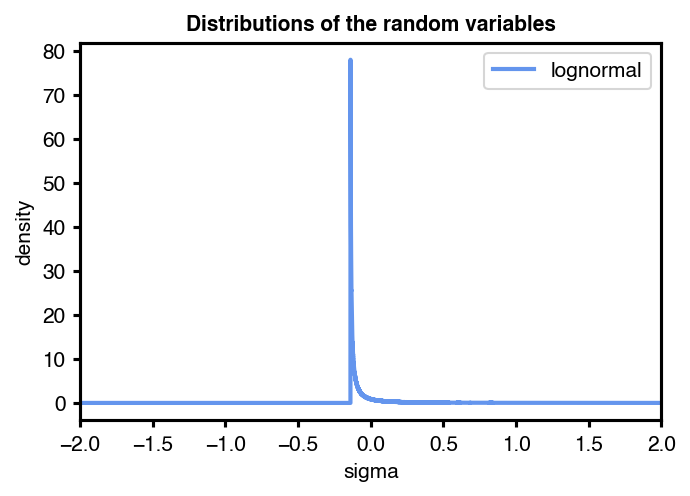

In [3]:
Rlog_standardized = (Rlog - np.mean(Rlog))/np.std(Rlog)

xinc = 0.0001
xbins = np.arange(-2,2,xinc)

cgf.cfig(2)

hx = np.histogram(Rlog_standardized,xbins)
plt.plot(hx[1][:-1],hx[0]/(float(N0)*xinc),'-',color='cornflowerblue', label='lognormal')

plt.legend()
plt.ylabel('density')
plt.xlim(-2,2)
plt.title('Distributions of the random variables')
plt.xlabel('sigma')

plt.show()

In [5]:
print(100.*float(sum(Rlog_standardized>1.0)/np.size(Rlog_standardized)))

2.02539
